In [66]:
import pandas as pd
import json
from sales_man_problem import *

# Clusters for Supermarkets

In [ ]:
population_data = pd.read_csv("population.csv")
places_data = pd.read_json("saudi_supermarkets_20250218_121912.json")
bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

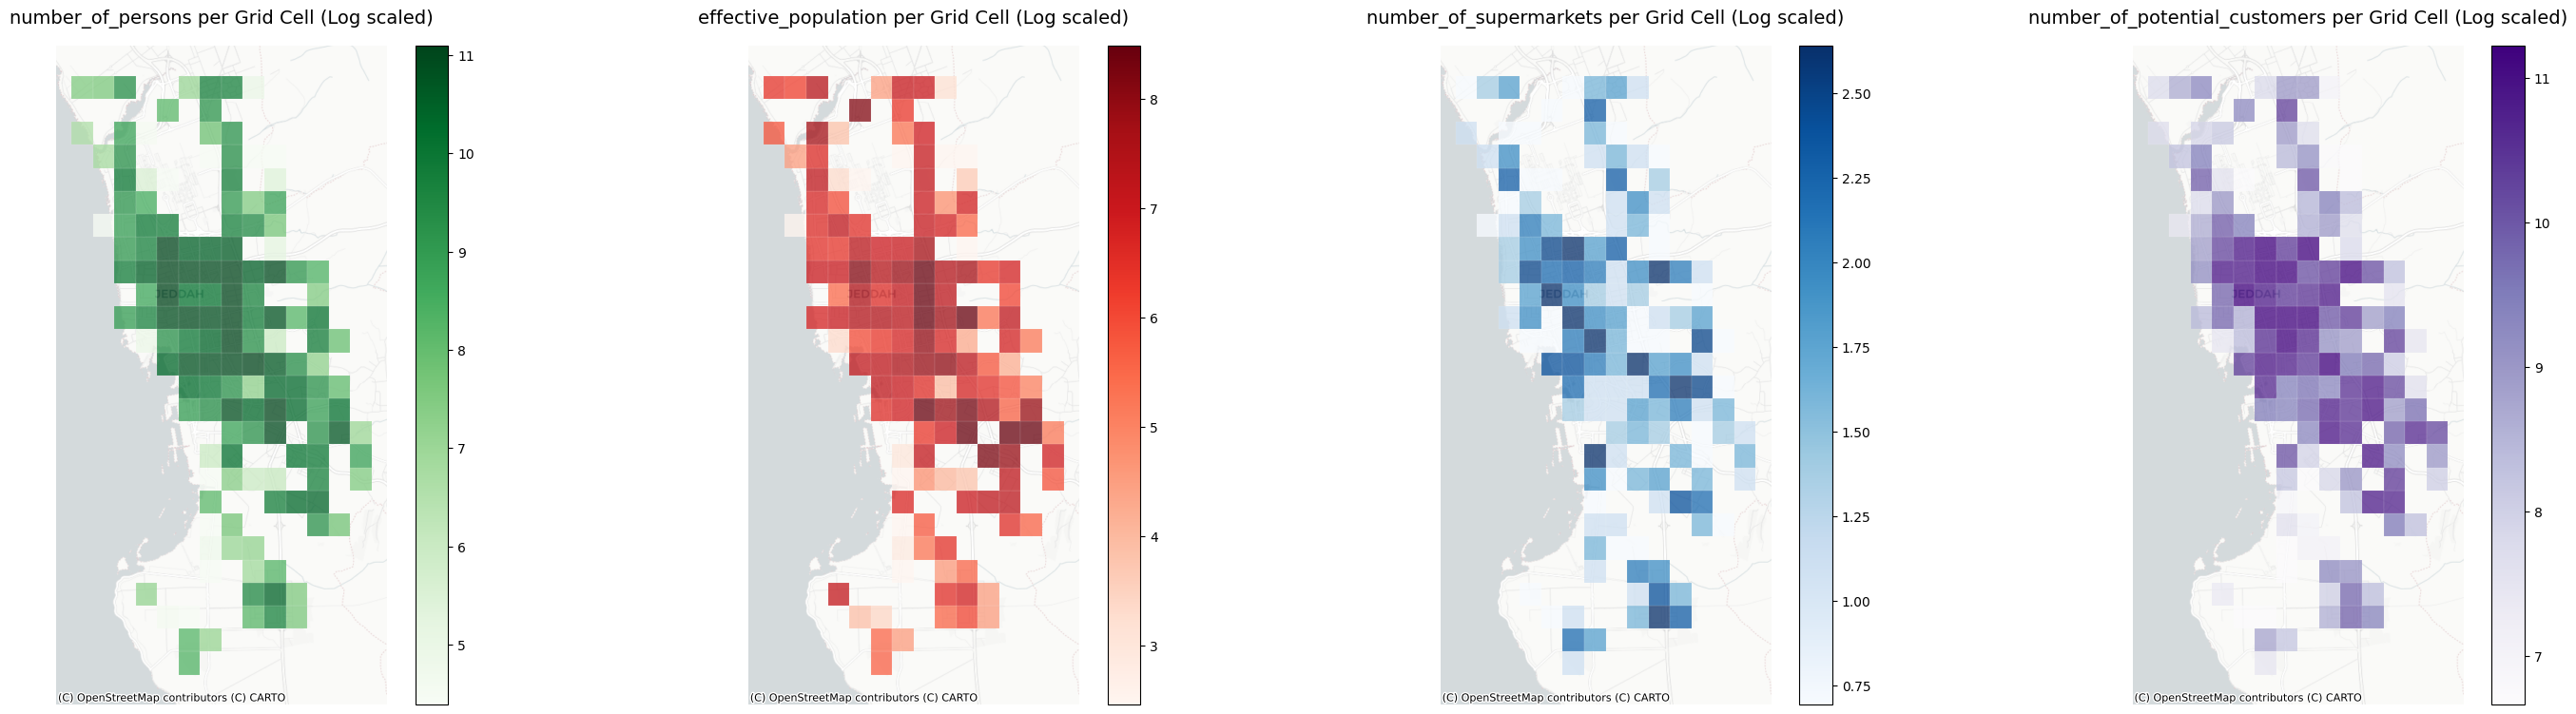

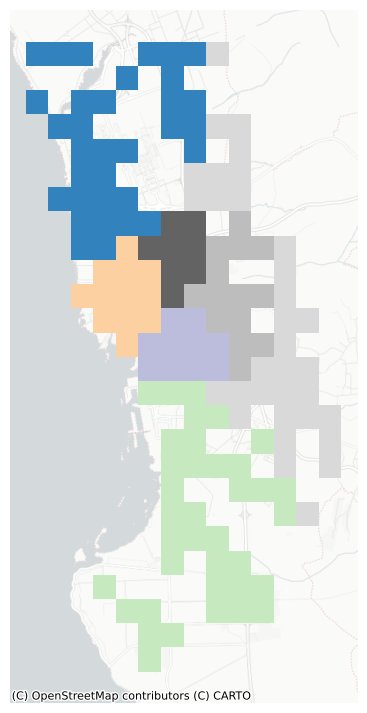

In [5]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5,
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

# Clusters for Supermarkets Using Income Data

In [5]:
population_data = pd.read_csv("population.csv")
places_data = pd.read_json("saudi_supermarkets_20250218_121912.json")
income_data = pd.read_csv("income.csv")
bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

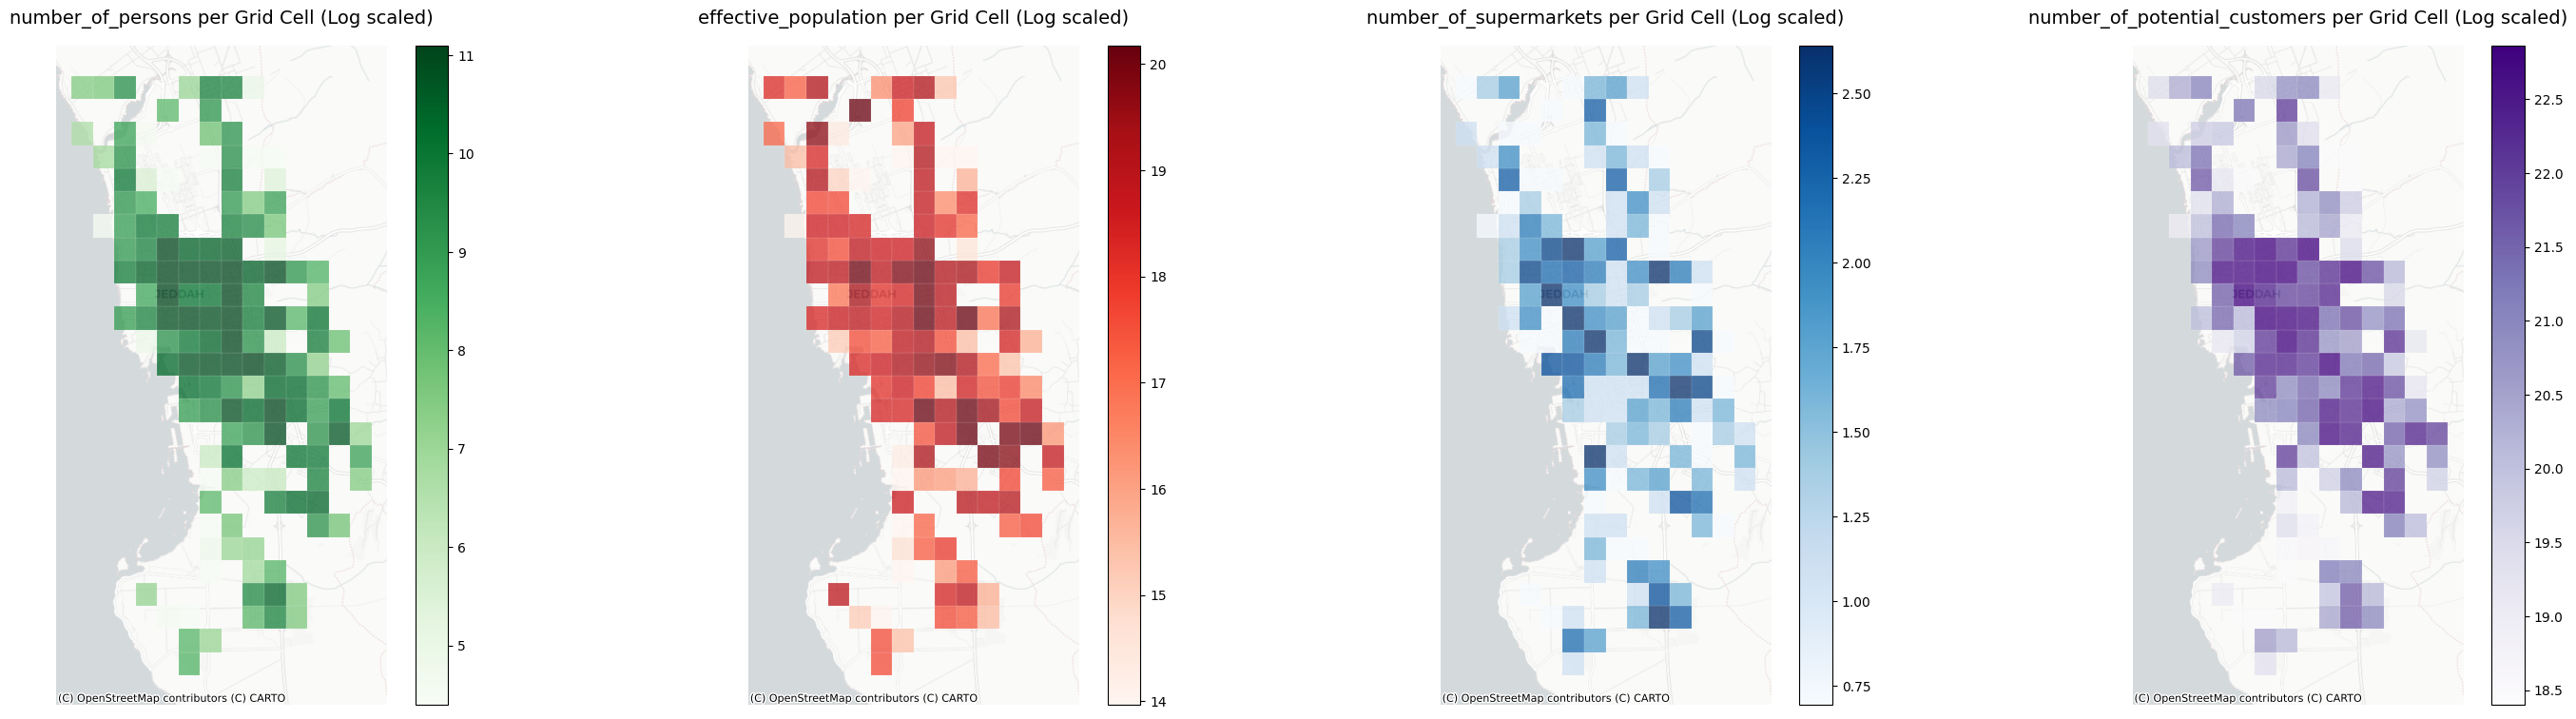

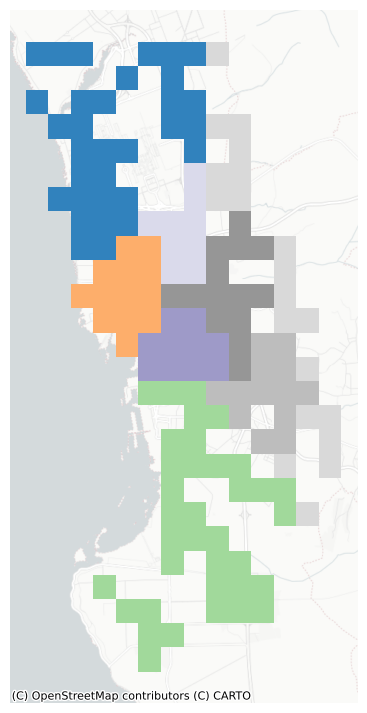

In [6]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=income_data,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5,
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

# Clusters for Pharmacies

In [7]:
population_data = pd.read_csv("population.csv")
places_data = pd.read_json("saudi_pharmacies_20250222_214042.json")
bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

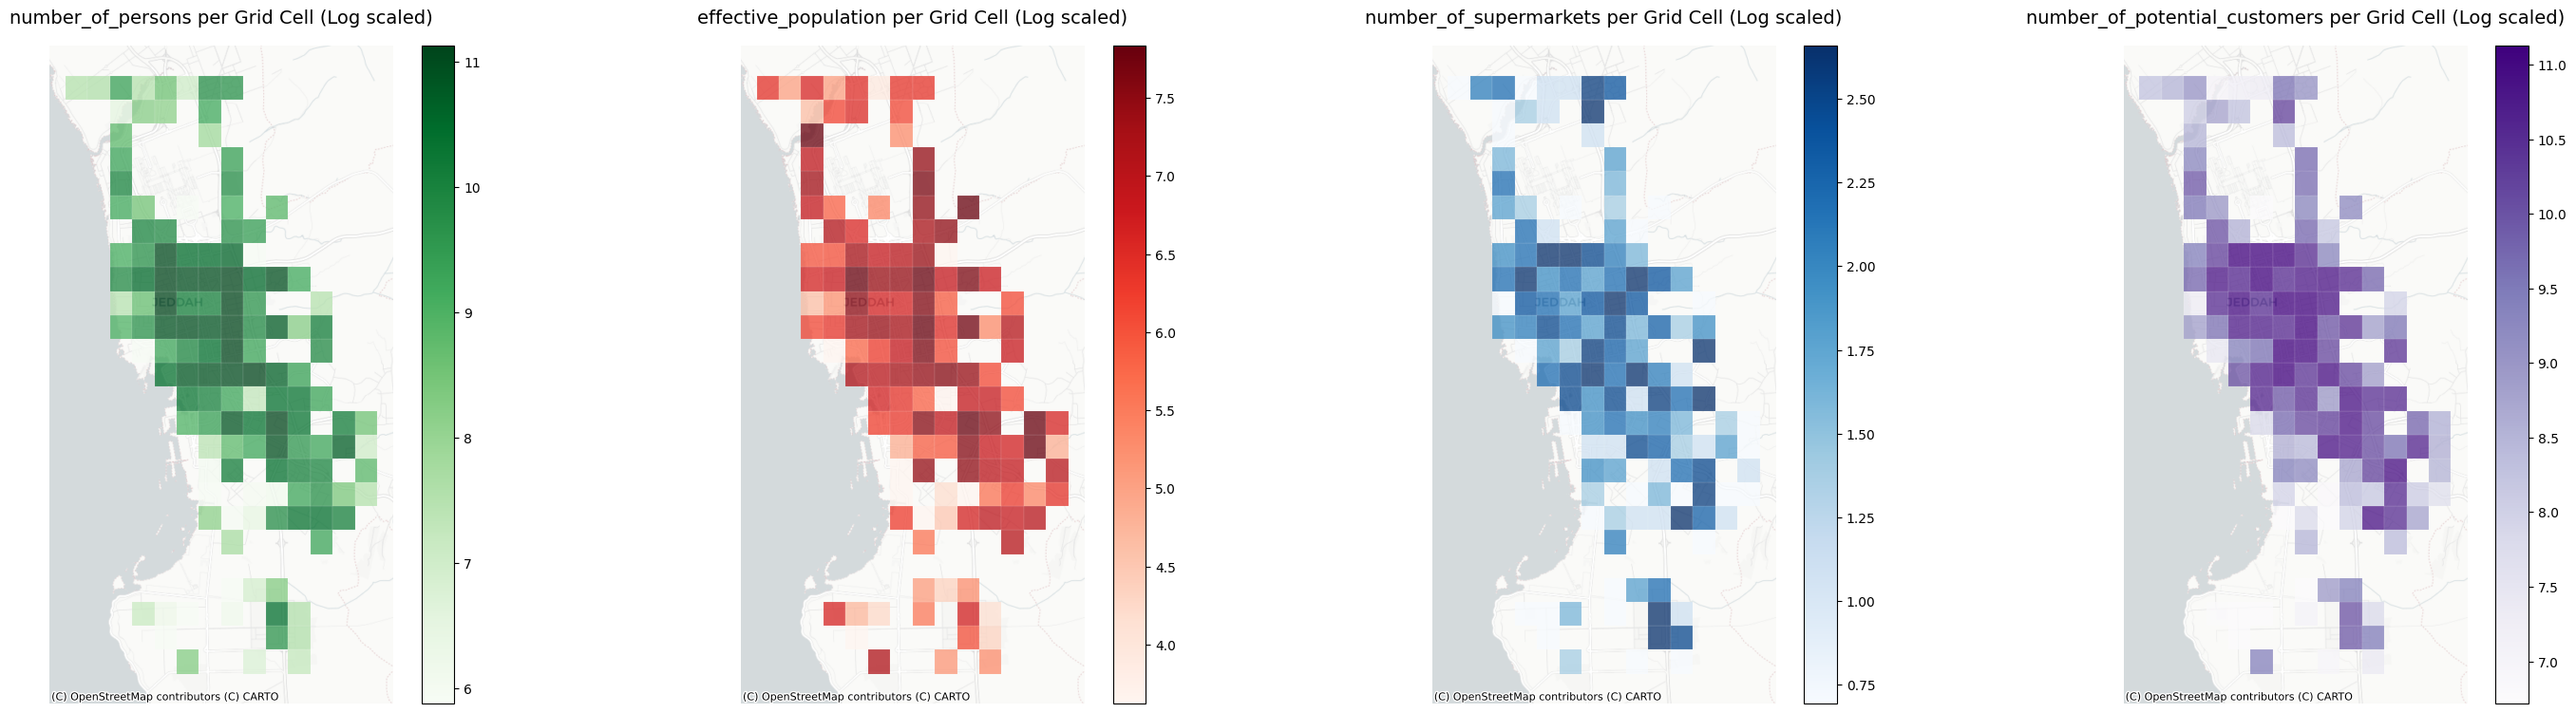

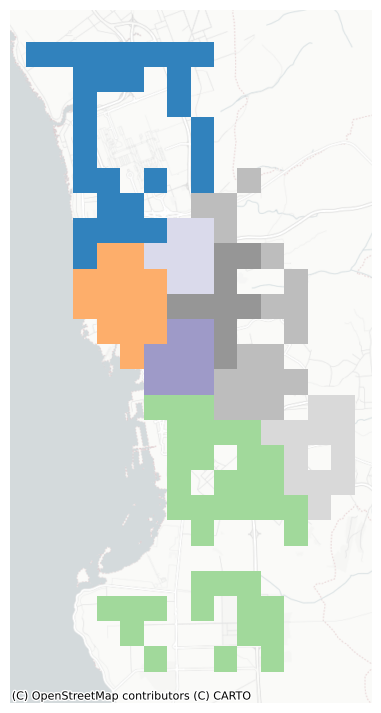

In [8]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data, 
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5, 
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

# Clusters for supermarkets and Pharmacies combined

In [9]:
population_data = pd.read_csv("population.csv")
places_data = pd.concat([pd.read_json("saudi_pharmacies_20250222_214042.json"), 
                        pd.read_json("saudi_supermarkets_20250218_121912.json")])

bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

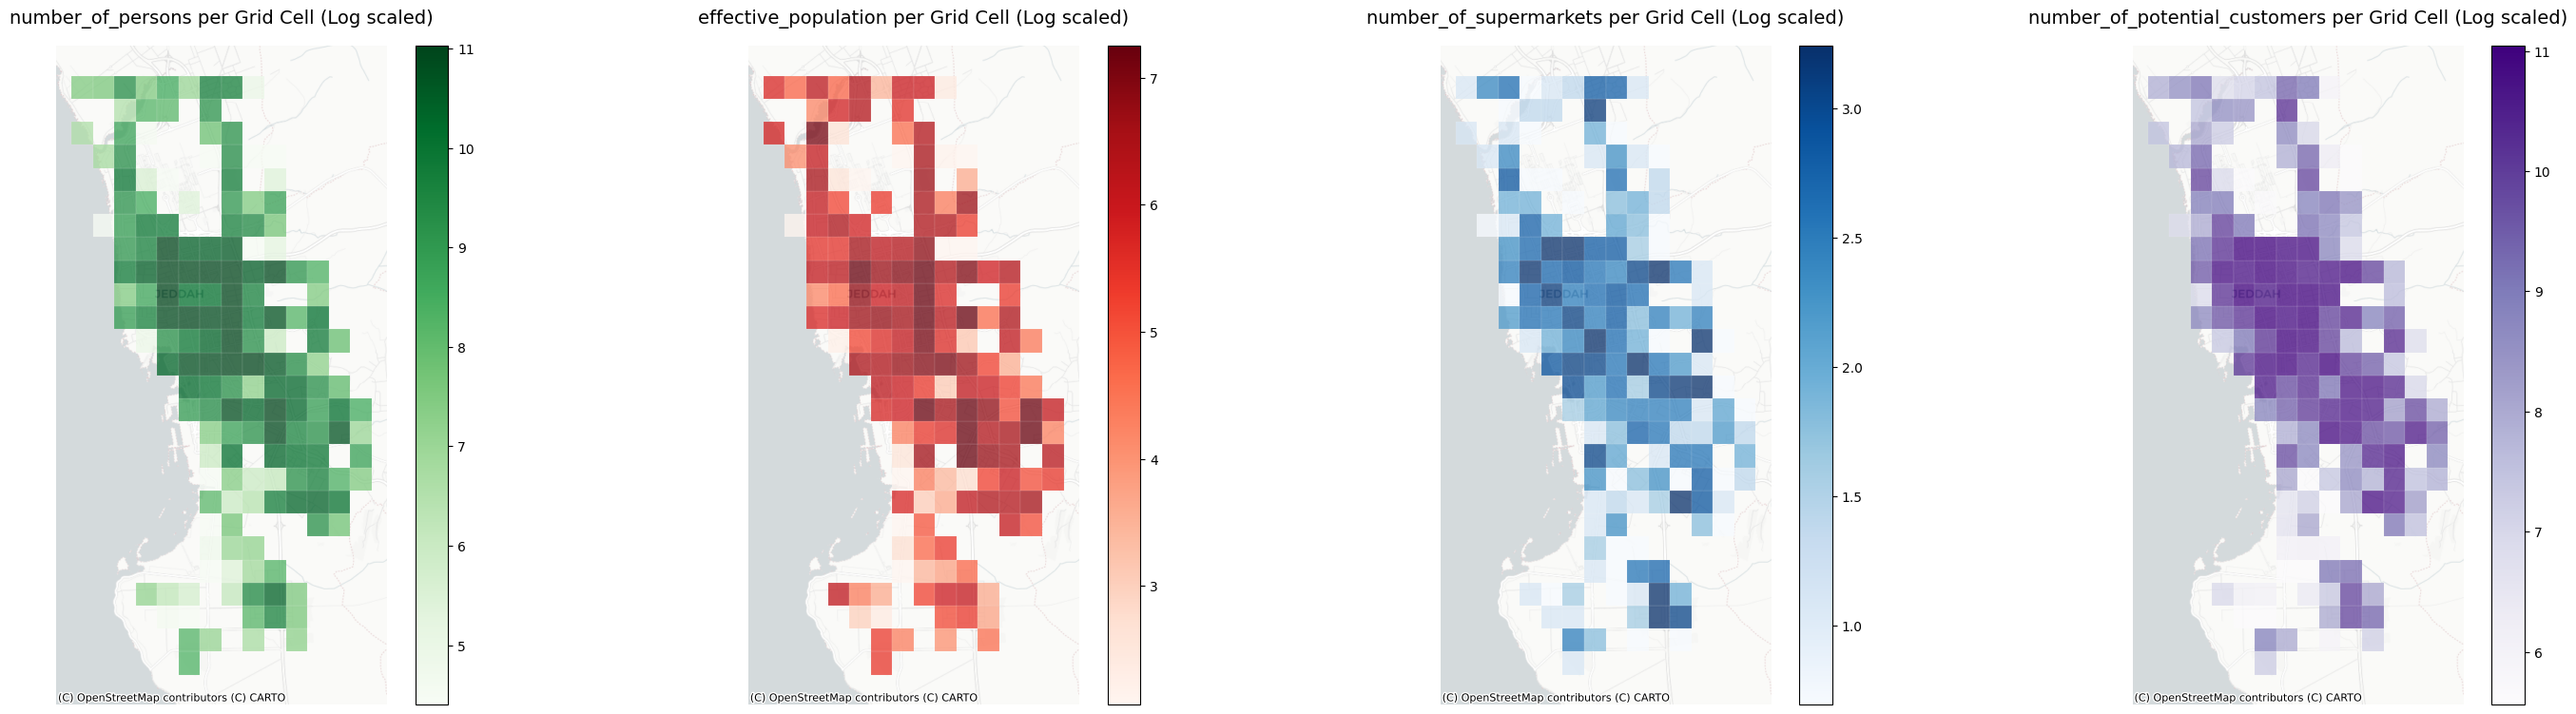

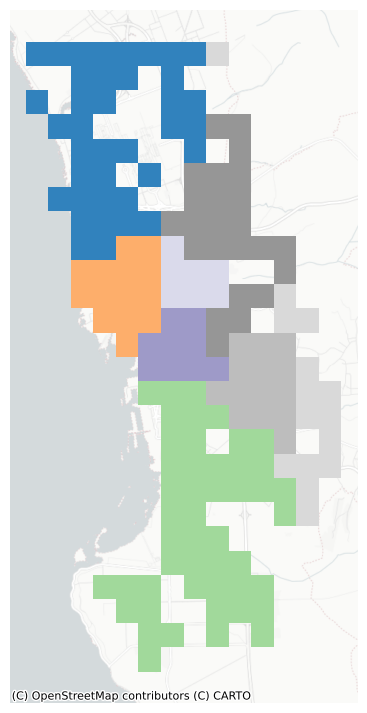

In [10]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5, 
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

In [ ]:
bounding_box = [(46.831005, 24.875028),
                (46.918779, 24.595223),
                (46.617594, 24.513821),
                (46.507446, 24.803183)]

population_data = gpd.GeoDataFrame.from_features(pd.read_json("population.json").features)
points = population_data.geometry.map(lambda x: x.centroid)
population_data["longitude"] = points.map(lambda x: x.x)
population_data["latitude"] = points.map(lambda x: x.y)
population_data = pd.DataFrame(population_data.drop("geometry", axis=1)).rename(columns={"PCNT":"population", "GLEVEL":"zoom_level"})

In [67]:
places_data = pd.read_csv("places_data.csv").rename(columns={"response_data":"data"})
places_data.data = places_data.data.map(json.loads)

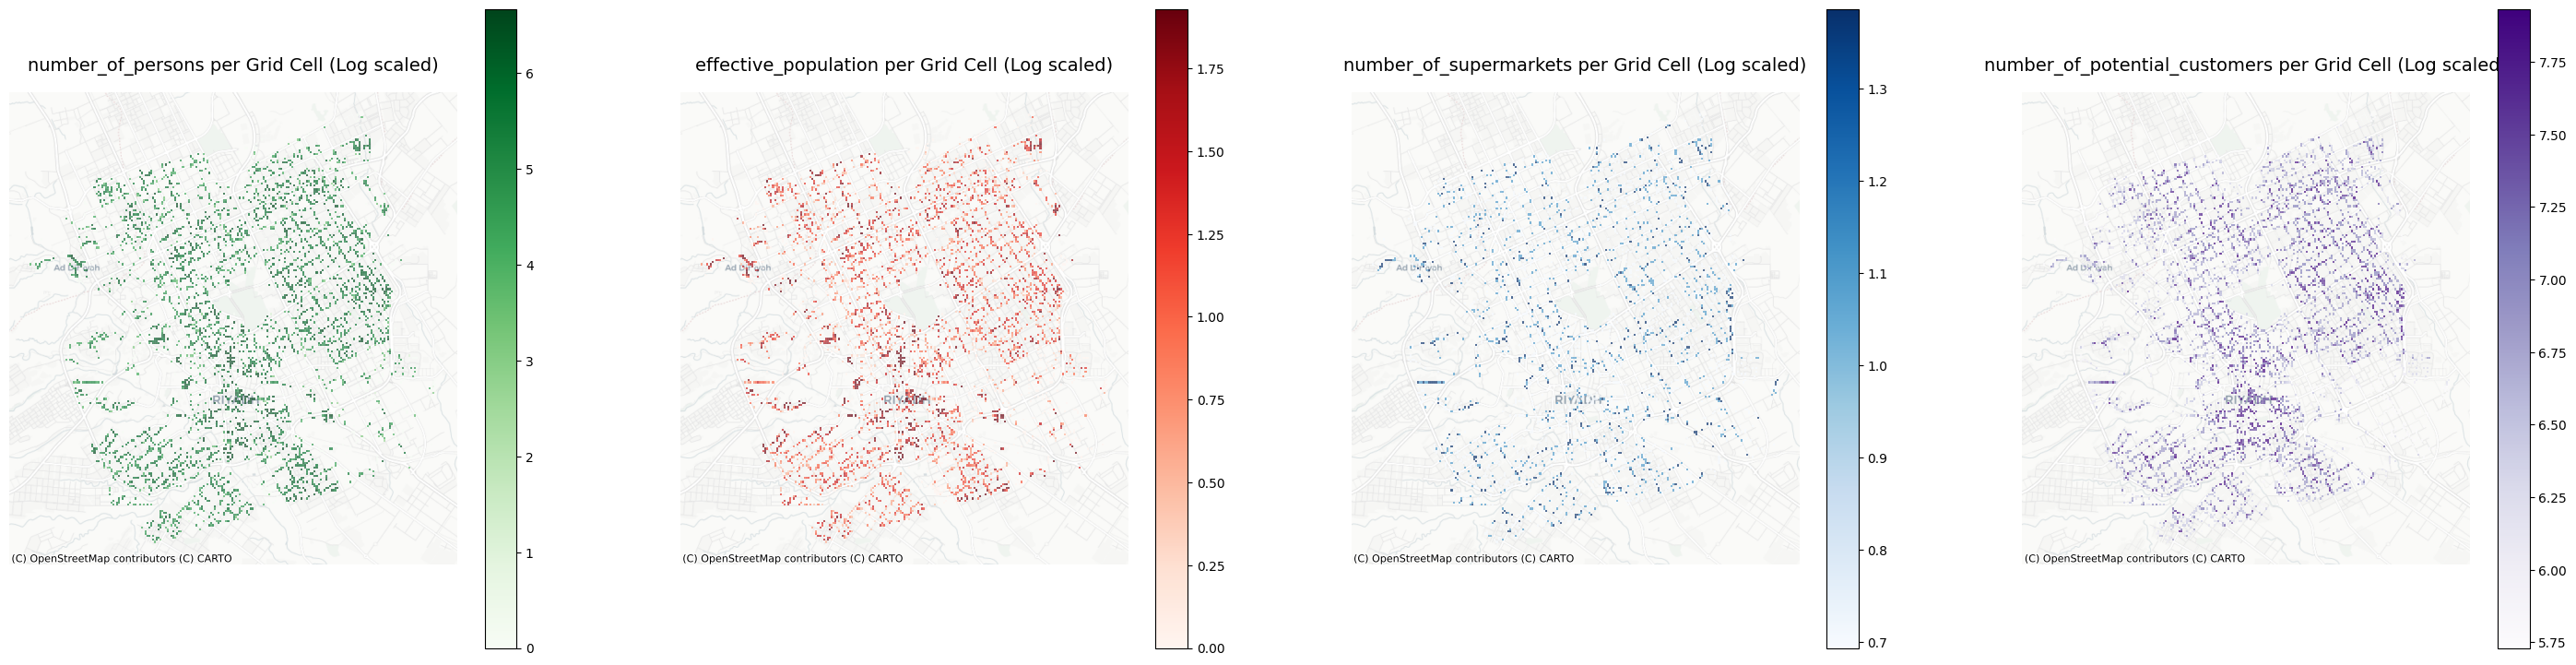

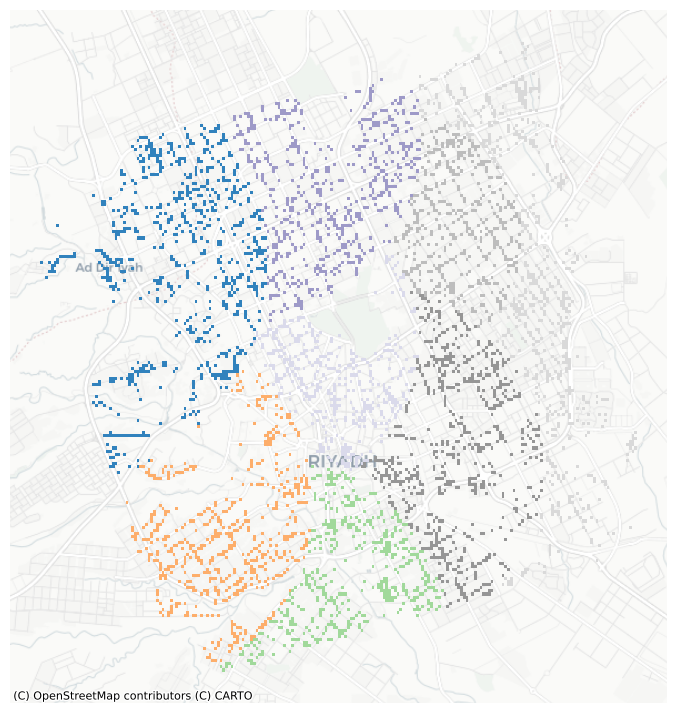

In [68]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5,
                                  zoom_level=16)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

In [70]:
import pickle as pkl
with open("results.pkl", "wb") as file:
    pkl.dump(data, file)

# Clusters for Supermarkets Using Income Data

In [ ]:
population_data = pd.read_csv("population.csv")
places_data = pd.read_json("saudi_supermarkets_20250218_121912.json")
income_data = pd.read_csv("income.csv")
bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

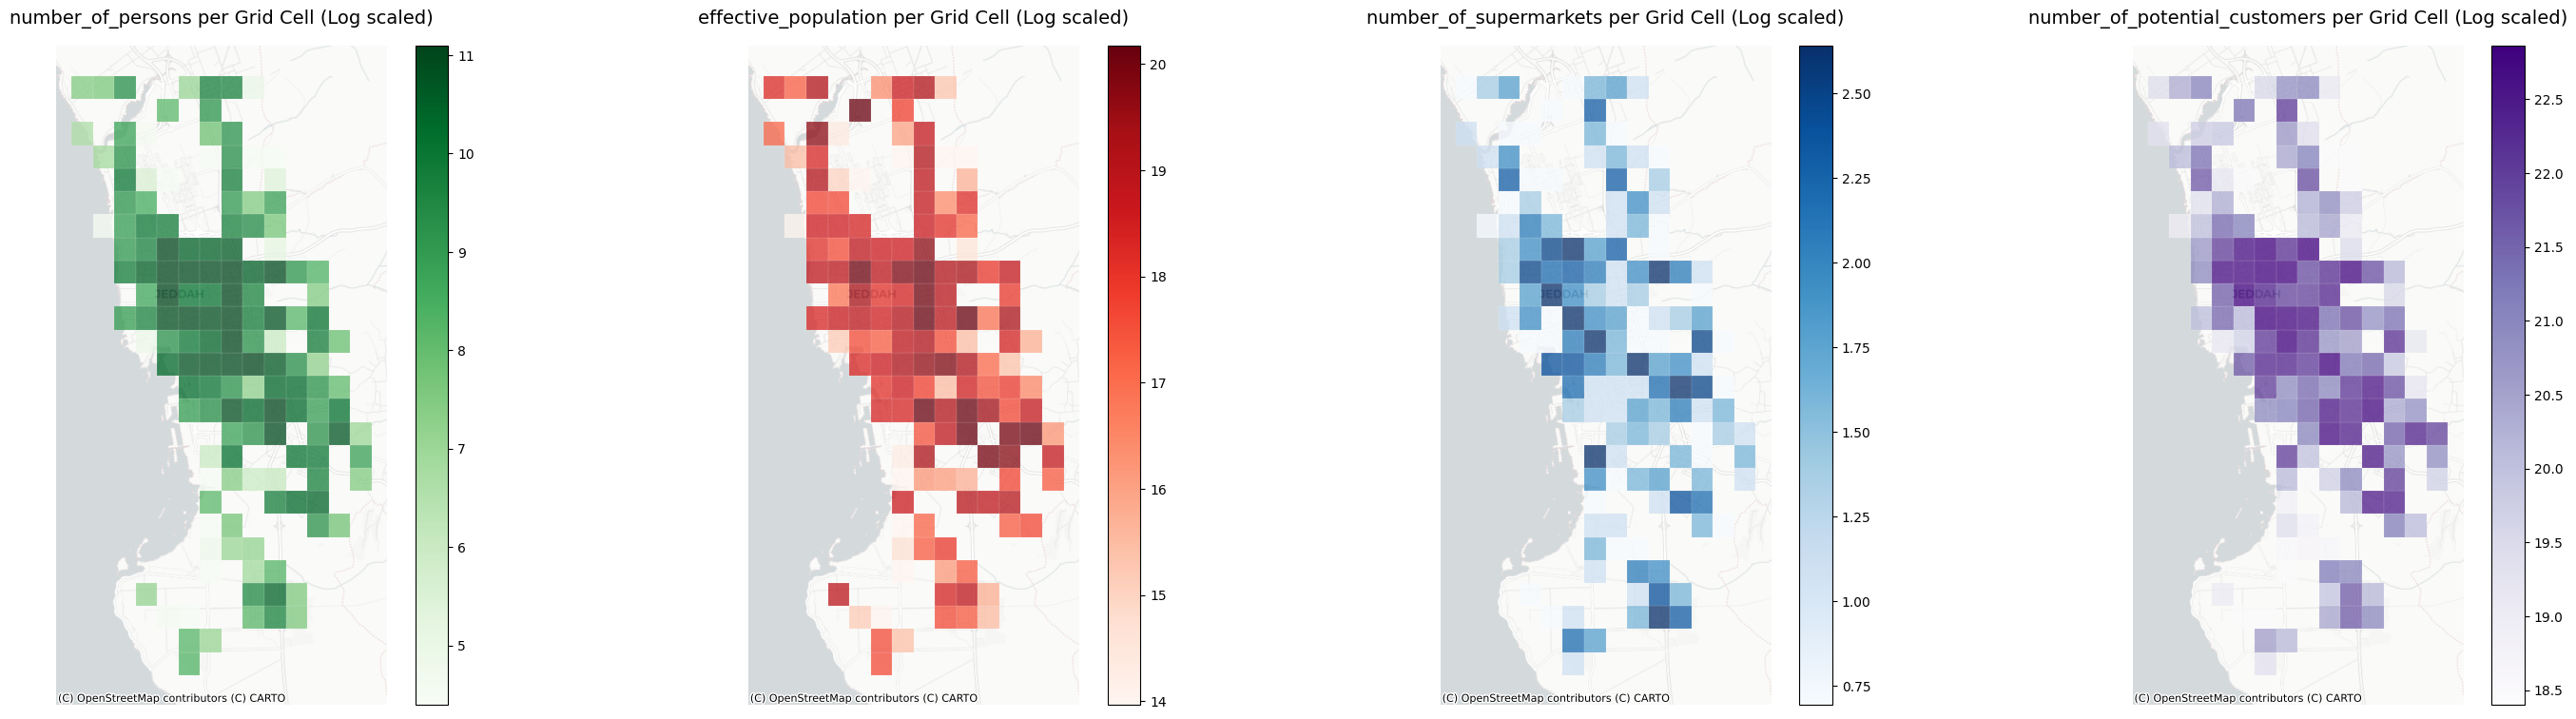

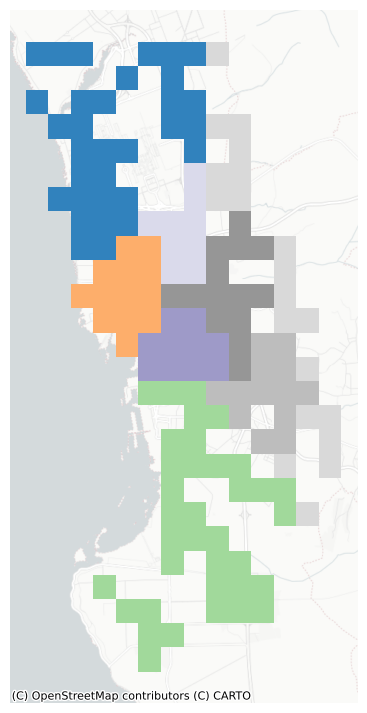

In [ ]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=income_data,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5,
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

# Clusters for Pharmacies

In [ ]:
population_data = pd.read_csv("population.csv")
places_data = pd.read_json("saudi_pharmacies_20250222_214042.json")
bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

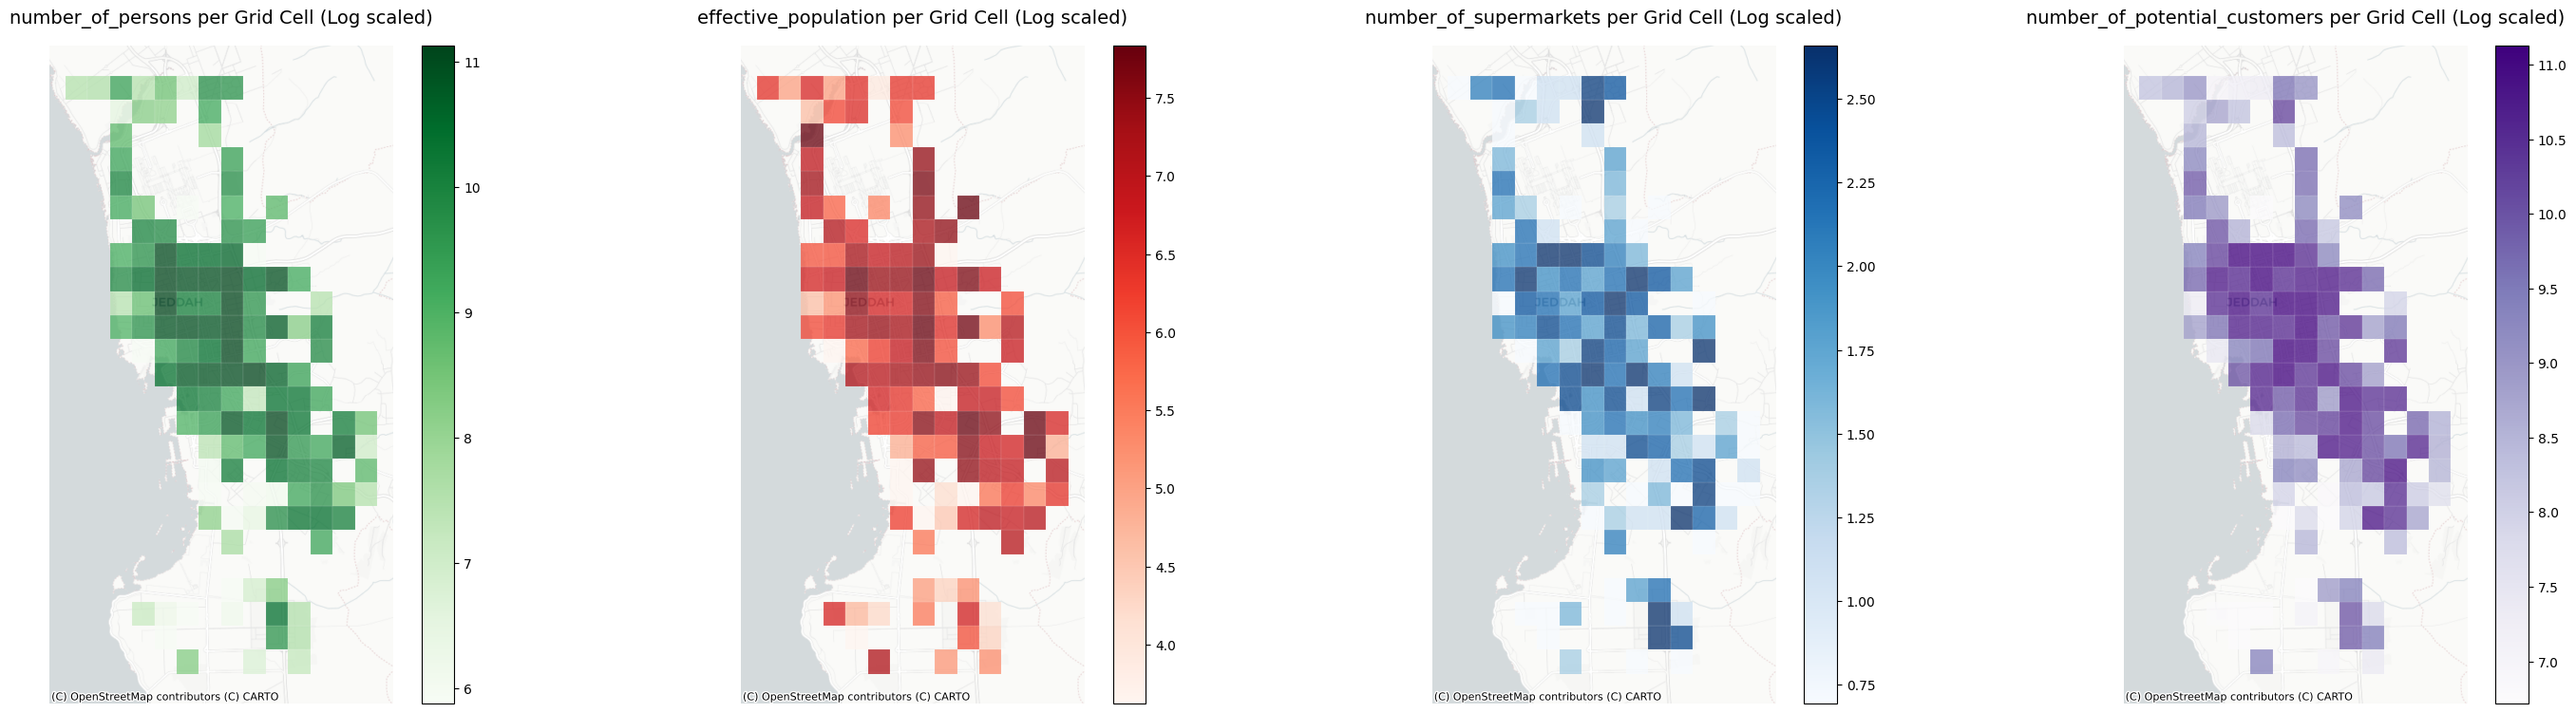

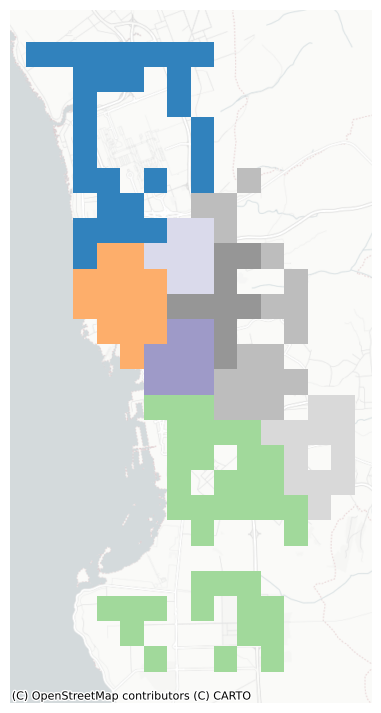

In [ ]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data, 
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5, 
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)

# Clusters for supermarkets and Pharmacies combined

In [ ]:
population_data = pd.read_csv("population.csv")
places_data = pd.concat([pd.read_json("saudi_pharmacies_20250222_214042.json"), 
                        pd.read_json("saudi_supermarkets_20250218_121912.json")])

bounding_box = [(38.936119, 21.880214),
                (39.221764, 21.903151),
                (39.457970, 21.005913),
                (39.092674, 20.998221)]

population_data.zoom_level.unique()

array([nan,  4.,  5.,  6.,  7.,  8.,  9.,  3.])

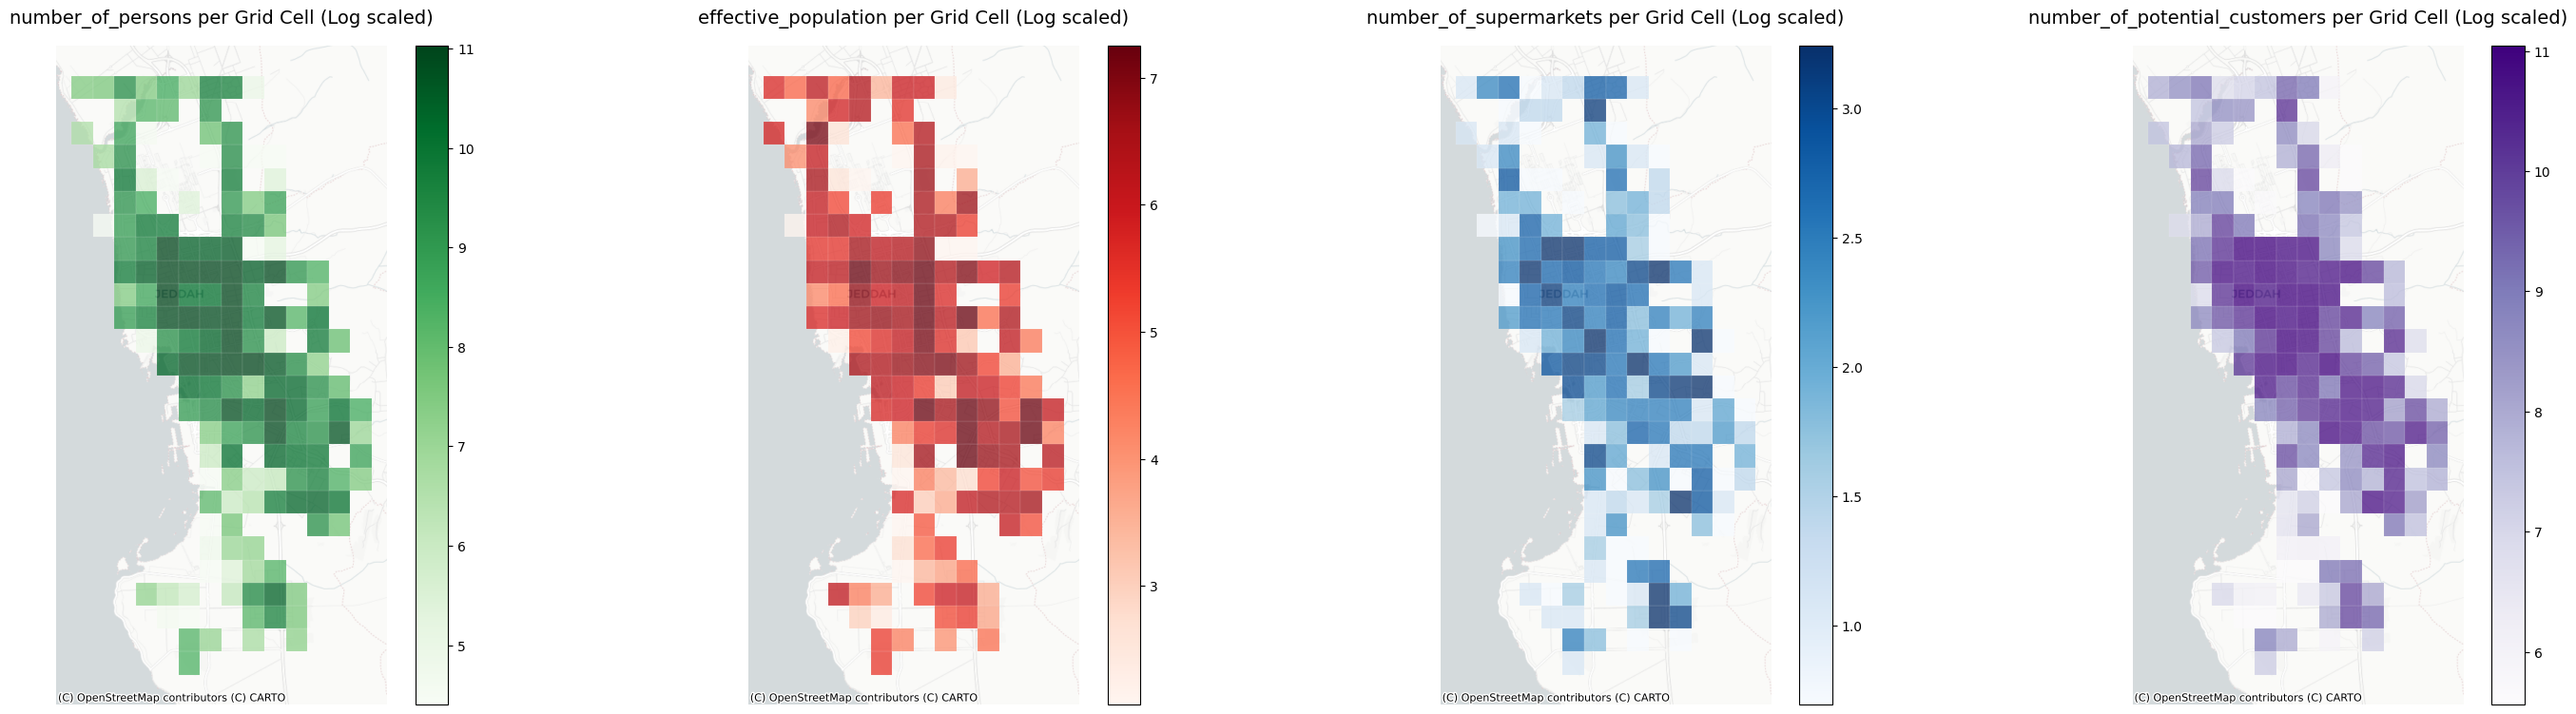

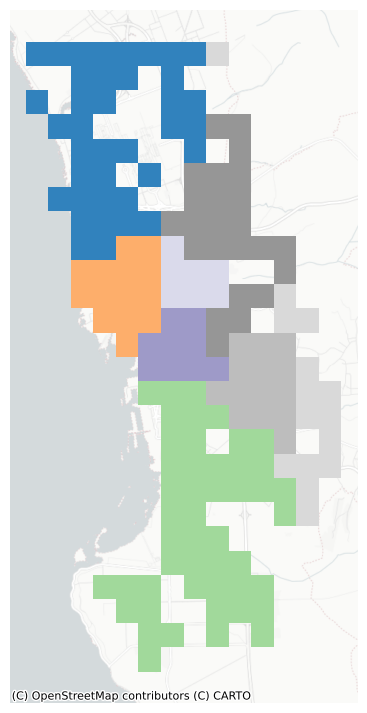

In [ ]:
data = get_clusters_for_sales_man(num_sales_man=8, 
                                  population=population_data, 
                                  places=places_data,
                                  weights=None,
                                  bounding_box=bounding_box, 
                                  distance_limit=2.5, 
                                  zoom_level=5)

plot_results(data.iloc[:,:-1], 4, 1, ["Greens", "Reds", "Blues", "Purples"], alpha=0.75)
plot_results(data[["geometry", "group"]], 1, 1, ["tab20c"], alpha=1, show_legends=False, edge_color=None, show_title=False)